# Feature Scaling Demo

(Quelle: https://bradzzz.gitbooks.io/ga-dsi-seattle/content/)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing

In [ ]:
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Skalierung der Daten

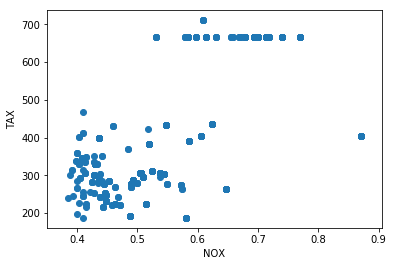

In [ ]:
xs = df["NOX"]
ys = df["TAX"]

plt.scatter(xs, ys)
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

### Standardisierung

Mit Hilfe der folgenden Formel führen wir eine Standardisierung durch und transformieren unsere Daten, sodass sie danach den Mittelwert Null $(\mu = 0)$ und die Varianz 1 besitzen $(\sigma^2 = 1)$:

$$ x' = \frac{x - \mu}{\sigma}$$

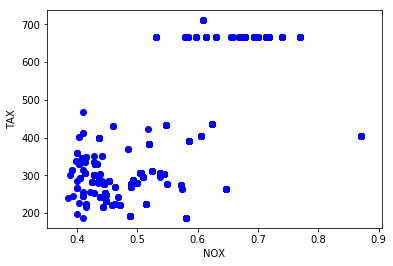

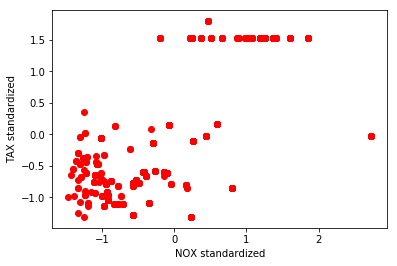

In [ ]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df["TAX"]
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()

Wie Sie sehen wurde die Form der Daten nicht verändert, nur die Skalierung. Sie können auch scikit-learn einsetzen, um Ihre Daten zu standardisieren.

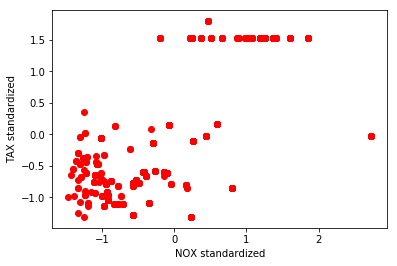

In [ ]:
from sklearn import preprocessing

xs = preprocessing.scale(df["NOX"])
ys = preprocessing.scale(df["TAX"])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX standardized")
plt.ylabel("TAX standardized")
plt.show()


### Min-Max Skalierung

Für die Min-Max Skalierung der Daten wird die folgende Formel verwendet:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

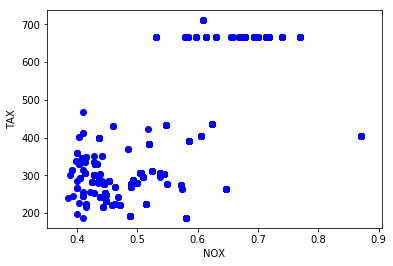

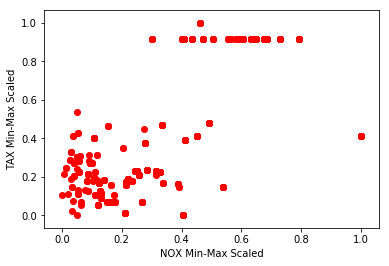

In [ ]:
xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()

xs = df["NOX"]
xmin = np.min(xs)
xmax = np.max(xs)
xs = [(x - xmin) / (xmax - xmin) for x in xs]

ys = df["TAX"]
ymin = np.min(ys)
ymax = np.max(ys)
ys = [(y - ymin) / (ymax - ymin) for y in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

In [ ]:
Sie können hierzu auch scikit-learn einsetzen.

SyntaxError: ignored

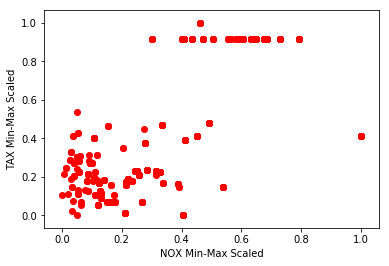

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

xs = scaler.fit_transform(df[["NOX"]])
ys = scaler.fit_transform(df[["TAX"]])

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX Min-Max Scaled")
plt.ylabel("TAX Min-Max Scaled")
plt.show()

### Normalisierung

Wir normalisieren die Daten, indem wir durch eine Art von Summe dividieren. Beispielsweise ist es üblich, durch die (*L1*) Summe $|X| = \sum_{x \in X}{x}$ oder durch die (*L2*) Summe (Euklidische Distanz )   $||X|| = \sqrt{\sum_{x \in X}{x^2}}$ zu normalisieren:

$$x' = \frac{x}{|X|}$$

## Übung

Normalisieren Sie mit Hilfe der L1 und L2 Summen and plotten Sie die Ergebnisse wie in den obigen Beispielen.

Wiederholen Sie die Übung [mit scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization).

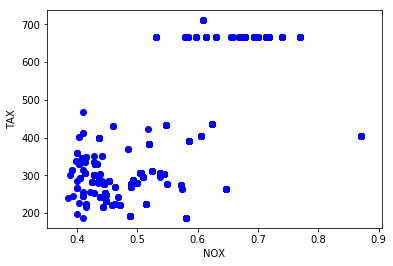

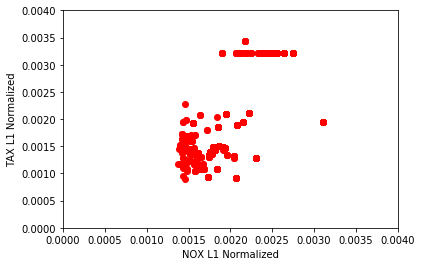

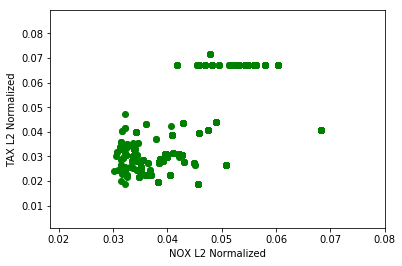

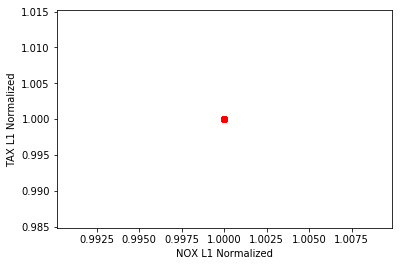

In [ ]:
from sklearn import preprocessing
import math

xs = df["NOX"]
ys = df["TAX"]
plt.scatter(xs, ys, color='b')
plt.xlabel("NOX")
plt.ylabel("TAX")
plt.show()


xs = df["NOX"]
ys = df["TAX"]
# Normalize xs and ys with L1 sum
xs_l1_sum = sum([abs(i) for i in xs])
xs = [i/xs_l1_sum for i in xs]
ys_l1_sum = sum([abs(i) for i in ys])
ys = [i/ys_l1_sum for i in ys]

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.xlim(0, 0.004)
plt.ylim(0, 0.004)
plt.show()

xs = df["NOX"]
ys = df["TAX"]
# Normalize xs and ys with L2 sum
xs_l2_sum = math.sqrt(sum([i**2 for i in xs]))
ys_l2_sum = math.sqrt(sum([i**2 for i in ys]))
xs = [i/xs_l2_sum for i in xs]
ys = [i/ys_l2_sum for i in ys]

plt.scatter(xs, ys, color='g')
plt.xlabel("NOX L2 Normalized")
plt.ylabel("TAX L2 Normalized")
plt.show()

# Sklearn
# Use preprocessing.normalize on xs and ys
xs = np.array(df["NOX"])
ys = np.array(df["TAX"])
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
xs = preprocessing.normalize(xs, norm="l1")
ys = preprocessing.normalize(ys, norm="l1")

plt.scatter(xs, ys, color='r')
plt.xlabel("NOX L1 Normalized")
plt.ylabel("TAX L1 Normalized")
plt.show()